<a href="https://colab.research.google.com/github/plance17/Aprendizaje-de-Maquina/blob/master/Teor%C3%ADa_5_Ejercicio_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import scipy
import math
import pandas as pd 
from scipy import linalg, optimize
from sympy.solvers import solve
from sympy import Symbol

from sklearn import neighbors
from sklearn import metrics
from sklearn import svm
import sklearn

import array as arr
# realizar solicitudes web desde una URL
import requests

import urllib.request 

# xlrd nos ayuda a extraer datos de hojas de cálculo de Excel (.xls y .xlsx)
# https://xlrd.readthedocs.io/en/latest/
from xlrd import open_workbook

Murder:	numeric	Murder arrests (per 100,000) \\
Assault:	numeric	Assault arrests (per 100,000) \\
UrbanPop:	numeric	Percent urban population  -- Porcentaje de la población viviendo en áreas urbanas.      \\
Rape:	numeric	Rape arrests (per 100,000) 

In [2]:
violent_crime = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectUSA/data/violent_crime.csv")
violent_crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
print(violent_crime.columns)
print('')
print(violent_crime.iloc[:,0])

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

0            Alabama
1             Alaska
2            Arizona
3           Arkansas
4         California
5           Colorado
6        Connecticut
7           Delaware
8            Florida
9            Georgia
10            Hawaii
11             Idaho
12          Illinois
13           Indiana
14              Iowa
15            Kansas
16          Kentucky
17         Louisiana
18             Maine
19          Maryland
20     Massachusetts
21          Michigan
22         Minnesota
23       Mississippi
24          Missouri
25           Montana
26          Nebraska
27            Nevada
28     New Hampshire
29        New Jersey
30        New Mexico
31          New York
32    North Carolina
33      North Dakota
34              Ohio
35          Oklahoma
36            Oregon
37      Pennsylvania
38      Rhode Island
39    South Carolina
40      South Dakota
41         Tennessee
42             Texas
43              U

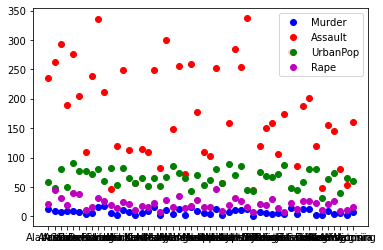

In [4]:
plt.plot(violent_crime.iloc[:,0],violent_crime.Murder,'bo',label='Murder')
plt.plot(violent_crime.iloc[:,0],violent_crime.Assault,'ro',label='Assault')
plt.plot(violent_crime.iloc[:,0],violent_crime.UrbanPop,'go',label='UrbanPop')
plt.plot(violent_crime.iloc[:,0],violent_crime.Rape,'mo',label='Rape')
plt.legend(loc='upper right')

In [5]:
murder_per_urbanpeople=np.zeros(violent_crime.iloc[:,0].size)
assault_per_urbanpeople=np.zeros(violent_crime.iloc[:,0].size)
rape_per_urbanpeople=np.zeros(violent_crime.iloc[:,0].size)

crimes=np.zeros((violent_crime.iloc[:,0].size,4))

for i in np.arange(0,violent_crime.iloc[:,0].size):
  crimes[i,0]=violent_crime.UrbanPop[i]
  crimes[i,1]=violent_crime.Murder[i]
  crimes[i,2]=violent_crime.Assault[i]
  crimes[i,3]=violent_crime.Rape[i]

  murder_per_urbanpeople[i]=violent_crime.Murder[i]/violent_crime.UrbanPop[i]
  assault_per_urbanpeople[i]=violent_crime.Assault[i]/violent_crime.UrbanPop[i]
  rape_per_urbanpeople[i]=violent_crime.Rape[i]/violent_crime.UrbanPop[i]

print(murder_per_urbanpeople)
print(assault_per_urbanpeople)

[0.22758621 0.20833333 0.10125    0.176      0.0989011  0.10128205
 0.04285714 0.08194444 0.1925     0.29       0.06385542 0.04814815
 0.1253012  0.11076923 0.03859649 0.09090909 0.18653846 0.23333333
 0.04117647 0.16865672 0.05176471 0.16351351 0.04090909 0.36590909
 0.12857143 0.11320755 0.06935484 0.15061728 0.0375     0.08314607
 0.16285714 0.12906977 0.28888889 0.01818182 0.09733333 0.09705882
 0.07313433 0.0875     0.03908046 0.3        0.08444444 0.22372881
 0.15875    0.04       0.06875    0.13492063 0.05479452 0.14615385
 0.03939394 0.11333333]
[4.06896552 5.47916667 3.675      3.8        3.03296703 2.61538462
 1.42857143 3.30555556 4.1875     3.51666667 0.55421687 2.22222222
 3.         1.73846154 0.98245614 1.74242424 2.09615385 3.77272727
 1.62745098 4.47761194 1.75294118 3.44594595 1.09090909 5.88636364
 2.54285714 2.05660377 1.64516129 3.11111111 1.01785714 1.78651685
 4.07142857 2.95348837 7.48888889 1.02272727 1.6        2.22058824
 2.37313433 1.47222222 2.         5.81

#**K mean**

In [21]:
from sklearn.cluster import KMeans

In [22]:
cluster_kmeans= KMeans(n_clusters=4)

classification_kmeans = cluster_kmeans.fit(crimes)
print(classification_kmeans)

centroids = classification_kmeans.cluster_centers_

print(centroids) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
[[ 68.3125      11.8125     272.5625      28.375     ]
 [ 65.6          5.59       112.4         17.27      ]
 [ 70.64285714   8.21428571 173.28571429  22.84285714]
 [ 53.9          2.95        62.7         11.51      ]]


En los centroides, el primer valor corresponde al porcentaje de población que vive en la ciudad(UrbanPop). La segunda columna corresponde a los asesinatos(Murder), la tercera a los asaltos(Assault) y la última a las violaciones(Rape).

Divido cada número de crímenes por el porcentaje de gente que vive en las ciudades en los centroides, así tendría una idea de que tantos crímenes se cometen en función de la gente que vive en las ciudades para cada grupo. \\

Las filas corresponden a cada grupo, el valor de la primer columna corresponde a Murder/UrbanPop, el de la segunda a Assault/UrbanPop y el de la tercera a Rape/UrbanPop.

In [23]:
centroids_per_UrbanPop=np.zeros((centroids.shape[0],centroids.shape[0]-1))


for i in np.arange(0,centroids_per_UrbanPop.shape[0]):
  for j in np.arange(0,centroids_per_UrbanPop.shape[1]):
    centroids_per_UrbanPop[i,j]=centroids[i,j+1]/centroids[i,0]
  
print(centroids_per_UrbanPop) 



[[0.17291857 3.98993596 0.41537054]
 [0.08521341 1.71341463 0.2632622 ]
 [0.11627907 2.45298281 0.32335693]
 [0.05473098 1.16326531 0.2135436 ]]


Bansándose en los centroides de cada grupo, en orden de seguridad decreciente, los grupos se clasificarían: \\

Grupo 3: Muy seguro

Grupo 1: Seguro

Grupo 0: Inseguro

Grupo 2: Muy inseguro

Respecto a los centroides, los Estados correspondientes al grupo 2 son los mas inseguros, y no son los que presentan un mayor porcentaje de población en las ciudades, a pesar de presentar un valor similar al del grupo 0 en este porcentaje (grupo con mayor porcentaje de población en las ciudades).


In [24]:
groups=np.zeros(violent_crime.iloc[:,0].size)
for i in np.arange(0,violent_crime.iloc[:,0].size):
  groups[i]=cluster_kmeans.predict(np.c_[crimes[i,0],crimes[i,1],crimes[i,2],crimes[i,3]])
  print(violent_crime.iloc[i,0],groups[i])

print(groups)

Alabama 0.0
Alaska 0.0
Arizona 0.0
Arkansas 2.0
California 0.0
Colorado 2.0
Connecticut 1.0
Delaware 0.0
Florida 0.0
Georgia 2.0
Hawaii 3.0
Idaho 1.0
Illinois 0.0
Indiana 1.0
Iowa 3.0
Kansas 1.0
Kentucky 1.0
Louisiana 0.0
Maine 3.0
Maryland 0.0
Massachusetts 2.0
Michigan 0.0
Minnesota 3.0
Mississippi 0.0
Missouri 2.0
Montana 1.0
Nebraska 1.0
Nevada 0.0
New Hampshire 3.0
New Jersey 2.0
New Mexico 0.0
New York 0.0
North Carolina 0.0
North Dakota 3.0
Ohio 1.0
Oklahoma 2.0
Oregon 2.0
Pennsylvania 1.0
Rhode Island 2.0
South Carolina 0.0
South Dakota 3.0
Tennessee 2.0
Texas 2.0
Utah 1.0
Vermont 3.0
Virginia 2.0
Washington 2.0
West Virginia 3.0
Wisconsin 3.0
Wyoming 2.0
[0. 0. 0. 2. 0. 2. 1. 0. 0. 2. 3. 1. 0. 1. 3. 1. 1. 0. 3. 0. 2. 0. 3. 0.
 2. 1. 1. 0. 3. 2. 0. 0. 0. 3. 1. 2. 2. 1. 2. 0. 3. 2. 2. 1. 3. 2. 2. 3.
 3. 2.]


In [25]:
for i in np.arange(0,violent_crime.iloc[:,0].size):
  print(violent_crime.iloc[i,0],violent_crime.iloc[i,1],violent_crime.iloc[i,2],violent_crime.iloc[i,3],violent_crime.iloc[i,4],'  ','group:',groups[i])

Alabama 13.2 236 58 21.2    group: 0.0
Alaska 10.0 263 48 44.5    group: 0.0
Arizona 8.1 294 80 31.0    group: 0.0
Arkansas 8.8 190 50 19.5    group: 2.0
California 9.0 276 91 40.6    group: 0.0
Colorado 7.9 204 78 38.7    group: 2.0
Connecticut 3.3 110 77 11.1    group: 1.0
Delaware 5.9 238 72 15.8    group: 0.0
Florida 15.4 335 80 31.9    group: 0.0
Georgia 17.4 211 60 25.8    group: 2.0
Hawaii 5.3 46 83 20.2    group: 3.0
Idaho 2.6 120 54 14.2    group: 1.0
Illinois 10.4 249 83 24.0    group: 0.0
Indiana 7.2 113 65 21.0    group: 1.0
Iowa 2.2 56 57 11.3    group: 3.0
Kansas 6.0 115 66 18.0    group: 1.0
Kentucky 9.7 109 52 16.3    group: 1.0
Louisiana 15.4 249 66 22.2    group: 0.0
Maine 2.1 83 51 7.8    group: 3.0
Maryland 11.3 300 67 27.8    group: 0.0
Massachusetts 4.4 149 85 16.3    group: 2.0
Michigan 12.1 255 74 35.1    group: 0.0
Minnesota 2.7 72 66 14.9    group: 3.0
Mississippi 16.1 259 44 17.1    group: 0.0
Missouri 9.0 178 70 28.2    group: 2.0
Montana 6.0 109 53 16.4    

In [28]:
#group_0_data=np.zeros((violent_crime.iloc[:,0].size,4))
#group_1_data=np.zeros((violent_crime.iloc[:,0].size,4))
#group_2_data=np.zeros((violent_crime.iloc[:,0].size,4))
#group_3_data=np.zeros((violent_crime.iloc[:,0].size,4))

group_0_data=[]
group_1_data=[]
group_2_data=[]
group_3_data=[]


for i in np.arange(0,violent_crime.iloc[:,0].size):
  if groups[i]==0:
    #Si lo pongo como violent_crime.iloc[i,:] no me copia los datos como yo quiero
    group_0_data.append([violent_crime.iloc[i,0],violent_crime.iloc[i,1],violent_crime.iloc[i,2],violent_crime.iloc[i,3],violent_crime.iloc[i,4]])
  if groups[i]==1:
    group_1_data.append([violent_crime.iloc[i,0],violent_crime.iloc[i,1],violent_crime.iloc[i,2],violent_crime.iloc[i,3],violent_crime.iloc[i,4]])
  if groups[i]==2:
    group_2_data.append([violent_crime.iloc[i,0],violent_crime.iloc[i,1],violent_crime.iloc[i,2],violent_crime.iloc[i,3],violent_crime.iloc[i,4]])
  if groups[i]==3:
    group_3_data.append([violent_crime.iloc[i,0],violent_crime.iloc[i,1],violent_crime.iloc[i,2],violent_crime.iloc[i,3],violent_crime.iloc[i,4]])

print(len(group_0_data)+len(group_1_data)+len(group_2_data)+len(group_3_data))
print('')
group_0_data=np.resize(group_0_data,(len(group_0_data),5))
group_1_data=np.resize(group_1_data,(len(group_1_data),5))
group_2_data=np.resize(group_2_data,(len(group_2_data),5))
group_3_data=np.resize(group_3_data,(len(group_3_data),5))

print(group_0_data[:,1])
print(group_1_data[:,1])
print(group_2_data[:,1])
print(group_3_data[:,1])
print('')

print('Número mínimo y máximo de asesinatos de cada grupo de clasificación:')
print('Grupo 0:',min(group_0_data[:,1]),max(group_0_data[:,1]))
print('Grupo 1:',min(group_1_data[:,1]),max(group_1_data[:,1]))
print('Grupo 2:',min(group_2_data[:,1]),max(group_2_data[:,1]))
print('Grupo 3:',min(group_3_data[:,1]),max(group_3_data[:,1]))

50

['3.3' '2.6' '7.2' '6.0' '9.7' '6.0' '4.3' '7.3' '6.3' '3.2']
['13.2' '10.0' '8.1' '9.0' '5.9' '15.4' '10.4' '15.4' '11.3' '12.1' '16.1'
 '12.2' '11.4' '11.1' '13.0' '14.4']
['8.8' '7.9' '17.4' '4.4' '9.0' '7.4' '6.6' '4.9' '3.4' '13.2' '12.7'
 '8.5' '4.0' '6.8']
['5.3' '2.2' '2.1' '2.7' '2.1' '0.8' '3.8' '2.2' '5.7' '2.6']

Número mínimo y máximo de asesinatos de cada grupo de clasificación:
Grupo 0: 2.6 9.7
Grupo 1: 10.0 9.0
Grupo 2: 12.7 9.0
Grupo 3: 0.8 5.7


No sé por que en el grupo 1 y 3 me calcula mal los mínimos y máximos, y en el 2 y 4 los calcula bien.

Pruebo hacer dividir los Estados según uno de los atributos, asalto, asesinato o violación, y el porcentaje de gente en las ciudades.

  crimes[i,0]=UrbanPop[i] \\
  crimes[i,1]=Murder[i] \\
  crimes[i,2]=Assault[i] \\
  crimes[i,3]=Rape[i]

**Asaltos**

In [77]:
crimes_assault=np.zeros((violent_crime.iloc[:,0].size,2))

for i in np.arange(0,violent_crime.iloc[:,0].size):
  #Normalizo los datos entre 0 y 1
  crimes_assault[i,0]=violent_crime.UrbanPop[i]/violent_crime.UrbanPop.max()
  crimes_assault[i,1]=violent_crime.Assault[i]/violent_crime.Assault.max()


classification_kmeans_1 = cluster_kmeans.fit(crimes_assault)
print(classification_kmeans_1)

centroids = classification_kmeans.cluster_centers_

print(centroids)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
[[ 68.3125      11.8125     272.5625      28.375     ]
 [ 65.6          5.59       112.4         17.27      ]
 [ 70.64285714   8.21428571 173.28571429  22.84285714]
 [ 53.9          2.95        62.7         11.51      ]]


In [30]:
groups_assault=np.zeros(violent_crime.iloc[:,0].size)
for i in np.arange(0,violent_crime.iloc[:,0].size):
  groups_assault[i]=cluster_kmeans.predict(np.c_[crimes_assault[i,0],crimes_assault[i,1]])

Grupo 0: ['Alabama' 'Alaska' 'Arkansas' 'Georgia' 'Louisiana' 'Mississippi'
 'North Carolina' 'South Carolina' 'Tennessee']
Grupo 1: ['Idaho' 'Iowa' 'Kentucky' 'Maine' 'Minnesota' 'Montana' 'Nebraska'
 'New Hampshire' 'North Dakota' 'South Dakota' 'Vermont' 'West Virginia'
 'Wisconsin']
Grupo 2: ['Arizona' 'California' 'Colorado' 'Delaware' 'Florida' 'Illinois'
 'Maryland' 'Michigan' 'Nevada' 'New Mexico' 'New York' 'Texas']
Grupo 3 ['Connecticut' 'Hawaii' 'Indiana' 'Kansas' 'Massachusetts' 'Missouri'
 'New Jersey' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island'
 'Utah' 'Virginia' 'Washington' 'Wyoming']


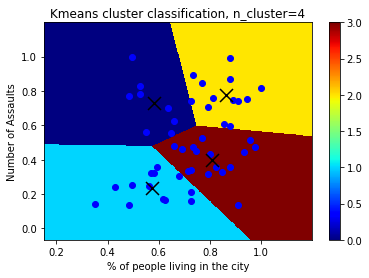

In [31]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .002     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = crimes_assault[:, 0].min() - 0.2, crimes_assault[:, 0].max() + 0.2
y_min, y_max = crimes_assault[:, 1].min() - 0.2, crimes_assault[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
z = cluster_kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
z = z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, z, cmap='jet',label=[0,1,2,3])
plt.plot(crimes_assault[:, 0],crimes_assault[:, 1],'bo')
#plt.plot(x_train[:,0],x_train[:,1],'go',label='Puntos de Train')
plt.xlabel('% of people living in the city')
plt.ylabel('Number of Assaults')
#plt.legend(loc='upper left')
plt.colorbar()
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=2,
            color='k', zorder=10)
plt.title('Kmeans cluster classification, n_cluster=4')



group_0_assault=[]
group_1_assault=[]
group_2_assault=[]
group_3_assault=[]

for i in np.arange(0,violent_crime.iloc[:,0].size):
  if groups_assault[i]==0:
    #Si lo pongo como violent_crime.iloc[i,:] no me copia los datos como yo quiero
    group_0_assault.append([violent_crime.iloc[i,0],violent_crime.iloc[i,1],groups_assault[i]])
  if groups_assault[i]==1:
    group_1_assault.append([violent_crime.iloc[i,0],violent_crime.iloc[i,1],groups_assault[i]])
  if groups_assault[i]==2:
    group_2_assault.append([violent_crime.iloc[i,0],violent_crime.iloc[i,1],groups_assault[i]])
  if groups_assault[i]==3:
    group_3_assault.append([violent_crime.iloc[i,0],violent_crime.iloc[i,1],groups_assault[i]])


group_0_assault=np.resize(group_0_assault,(len(group_0_assault),3))
group_1_assault=np.resize(group_1_assault,(len(group_1_assault),3))
group_2_assault=np.resize(group_2_assault,(len(group_2_assault),3))
group_3_assault=np.resize(group_3_assault,(len(group_3_assault),3))

print('Grupo 0:',group_0_assault[:,0])
print('Grupo 1:',group_1_assault[:,0])
print('Grupo 2:',group_2_assault[:,0])
print('Grupo 3',group_3_assault[:,0])


En temática de asaltos, los estados en el grupo 0(azul) corresponderían a los peores estados, poseen el menor número de gente en las ciudades y presentan de los mayores números de asaltos. El mejor grupo sería el grupo 1(celeste), que presenta un gran porcentaje de gente en ciudades y el número de asaltos no es tan grande. \\
Los grupo 0 y 1 serían intermedios. El grupo 3(rojo) posee bajo número de asaltos, pero posee un bajo porcentaje de gente en las ciudades, mientras que el grupo 2(amarillo), presenta un gran número de asaltos, pero correspondiente a un gran porcentaje de la gente viviendo en ciudades.

**Murder**

[[0.57234432 0.17768199]
 [0.81550029 0.34936479]
 [0.86935287 0.6743295 ]
 [0.58241758 0.75402299]]
Grupo 0: ['Idaho' 'Iowa' 'Maine' 'Minnesota' 'Montana' 'Nebraska' 'New Hampshire'
 'North Dakota' 'South Dakota' 'Vermont' 'West Virginia' 'Wisconsin']
Grupo 1: ['Arizona' 'Colorado' 'Connecticut' 'Delaware' 'Hawaii' 'Indiana' 'Kansas'
 'Massachusetts' 'Missouri' 'New Jersey' 'Ohio' 'Oklahoma' 'Oregon'
 'Pennsylvania' 'Rhode Island' 'Utah' 'Virginia' 'Washington' 'Wyoming']
Grupo 2: ['California' 'Florida' 'Illinois' 'Maryland' 'Michigan' 'Nevada'
 'New Mexico' 'New York' 'Texas']
Grupo 3 ['Alabama' 'Alaska' 'Arkansas' 'Georgia' 'Kentucky' 'Louisiana'
 'Mississippi' 'North Carolina' 'South Carolina' 'Tennessee']


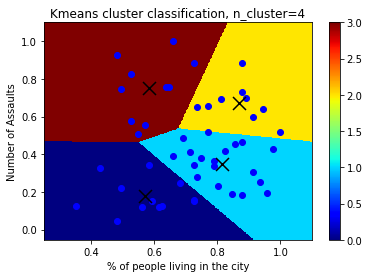

In [33]:
crimes_murder=np.zeros((violent_crime.iloc[:,0].size,2))

for i in np.arange(0,violent_crime.iloc[:,0].size):
  #Normalizo los datos entre 0 y 1
  crimes_murder[i,0]=violent_crime.UrbanPop[i]/violent_crime.UrbanPop.max()
  crimes_murder[i,1]=violent_crime.Murder[i]/violent_crime.Murder.max()


classification_kmeans_2 = cluster_kmeans.fit(crimes_murder)

centroids = classification_kmeans_2.cluster_centers_

print(centroids)

groups_murder=np.zeros(violent_crime.iloc[:,0].size)
for i in np.arange(0,violent_crime.iloc[:,0].size):
  groups_murder[i]=cluster_kmeans.predict(np.c_[crimes_murder[i,0],crimes_murder[i,1]])

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .002     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = crimes_murder[:, 0].min() - 0.1, crimes_murder[:, 0].max() + 0.1
y_min, y_max = crimes_murder[:, 1].min() - 0.1, crimes_murder[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
z = cluster_kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
z = z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, z, cmap='jet')
plt.plot(crimes_murder[:, 0],crimes_murder[:, 1],'bo',label='Conjunto 0')
#plt.plot(x_train[:,0],x_train[:,1],'go',label='Puntos de Train')
plt.xlabel('% of people living in the city')

plt.ylabel('Number of Assaults')
plt.colorbar()
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=2,
            color='k', zorder=10)
plt.title('Kmeans cluster classification, n_cluster=4')

group_0_murder=[]
group_1_murder=[]
group_2_murder=[]
group_3_murder=[]

for i in np.arange(0,violent_crime.iloc[:,0].size):
  if groups_murder[i]==0:
    #Si lo pongo como violent_crime.iloc[i,:] no me copia los datos como yo quiero
    group_0_murder.append([violent_crime.iloc[i,0],violent_crime.iloc[i,2],groups_murder[i]])
  if groups_murder[i]==1:
    group_1_murder.append([violent_crime.iloc[i,0],violent_crime.iloc[i,2],groups_murder[i]])
  if groups_murder[i]==2:
    group_2_murder.append([violent_crime.iloc[i,0],violent_crime.iloc[i,2],groups_murder[i]])
  if groups_murder[i]==3:
    group_3_murder.append([violent_crime.iloc[i,0],violent_crime.iloc[i,2],groups_murder[i]])


group_0_murder=np.resize(group_0_murder,(len(group_0_murder),3))
group_1_murder=np.resize(group_1_murder,(len(group_1_murder),3))
group_2_murder=np.resize(group_2_murder,(len(group_2_murder),3))
group_3_murder=np.resize(group_3_murder,(len(group_3_murder),3))

print('Grupo 0:',group_0_murder[:,0])
print('Grupo 1:',group_1_murder[:,0])
print('Grupo 2:',group_2_murder[:,0])
print('Grupo 3',group_3_murder[:,0])

En temática de asesinatos, los estados en el grupo 3(rojo) corresponderían a los peores estados, poseen el menor número de gente en las ciudades y presentan de los mayores números de asaltos. El mejor grupo sería el grupo 1(celeste), que presenta un gran porcentaje de gente en ciudades y el número de asesinatos no es tan grande. \\
Los grupo 2 y 3 serían intermedios. El grupo 0(azul) posee bajo número de asaltos, pero posee un bajo porcentaje de gente en las ciudades, mientras que el grupo 2(amarillo), presenta un gran número de asaltos, pero correspondiente a un gran porcentaje de la gente viviendo en ciudades. \\

La mayoría de los estados se encuentran en el grupo 0(azul), donde el mayor porcentaje de la gente vive en ciudades y los asesinatos no son muchos.

**Rape**

[[0.81550029 0.34936479]
 [0.58241758 0.75402299]
 [0.86935287 0.6743295 ]
 [0.57234432 0.17768199]]
Grupo 0: ['Alabama' 'Connecticut' 'Delaware' 'Hawaii' 'Indiana' 'Kansas'
 'Louisiana' 'Massachusetts' 'Minnesota' 'Nebraska' 'New Jersey' 'Ohio'
 'Oklahoma' 'Pennsylvania' 'Rhode Island' 'Utah' 'Virginia' 'Wisconsin'
 'Wyoming']
Grupo 1: ['Alaska' 'Georgia' 'South Carolina' 'Tennessee']
Grupo 2: ['Arizona' 'California' 'Colorado' 'Florida' 'Illinois' 'Maryland'
 'Michigan' 'Missouri' 'Nevada' 'New Mexico' 'New York' 'Oregon' 'Texas'
 'Washington']
Grupo 3 ['Arkansas' 'Idaho' 'Iowa' 'Kentucky' 'Maine' 'Mississippi' 'Montana'
 'New Hampshire' 'North Carolina' 'North Dakota' 'South Dakota' 'Vermont'
 'West Virginia']


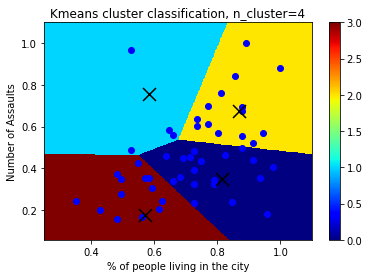

In [34]:
crimes_rape=np.zeros((violent_crime.iloc[:,0].size,2))

for i in np.arange(0,violent_crime.iloc[:,0].size):
  #Normalizo los datos entre 0 y 1
  crimes_rape[i,0]=violent_crime.UrbanPop[i]/violent_crime.UrbanPop.max()
  crimes_rape[i,1]=violent_crime.Rape[i]/violent_crime.Rape.max()


classification_kmeans_3 = cluster_kmeans.fit(crimes_murder)

centroids = classification_kmeans_3.cluster_centers_

print(centroids)

groups_rape=np.zeros(violent_crime.iloc[:,0].size)
for i in np.arange(0,violent_crime.iloc[:,0].size):
  groups_rape[i]=cluster_kmeans.predict(np.c_[crimes_rape[i,0],crimes_rape[i,1]])

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .002     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = crimes_rape[:, 0].min() - 0.1, crimes_rape[:, 0].max() + 0.1
y_min, y_max = crimes_rape[:, 1].min() - 0.1, crimes_rape[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
z = cluster_kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
z = z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, z, cmap='jet')
plt.plot(crimes_rape[:, 0],crimes_rape[:, 1],'bo',label='Conjunto 0')
#plt.plot(x_train[:,0],x_train[:,1],'go',label='Puntos de Train')
plt.xlabel('% of people living in the city')
plt.ylabel('Number of Assaults')
plt.colorbar()
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=2,
            color='k', zorder=10)
plt.title('Kmeans cluster classification, n_cluster=4')

group_0_rape=[]
group_1_rape=[]
group_2_rape=[]
group_3_rape=[]

for i in np.arange(0,violent_crime.iloc[:,0].size):
  if groups_rape[i]==0:
    #Si lo pongo como violent_crime.iloc[i,:] no me copia los datos como yo quiero
    group_0_rape.append([violent_crime.iloc[i,0],violent_crime.iloc[i,4],groups_rape[i]])
  if groups_rape[i]==1:
    group_1_rape.append([violent_crime.iloc[i,0],violent_crime.iloc[i,4],groups_rape[i]])
  if groups_rape[i]==2:
    group_2_rape.append([violent_crime.iloc[i,0],violent_crime.iloc[i,4],groups_rape[i]])
  if groups_rape[i]==3:
    group_3_rape.append([violent_crime.iloc[i,0],violent_crime.iloc[i,4],groups_rape[i]])


group_0_rape=np.resize(group_0_rape,(len(group_0_rape),3))
group_1_rape=np.resize(group_1_rape,(len(group_1_rape),3))
group_2_rape=np.resize(group_2_rape,(len(group_2_rape),3))
group_3_rape=np.resize(group_3_rape,(len(group_3_rape),3))

print('Grupo 0:',group_0_rape[:,0])
print('Grupo 1:',group_1_rape[:,0])
print('Grupo 2:',group_2_rape[:,0])
print('Grupo 3',group_3_rape[:,0])

En temática de violaciones, los estados en el grupo 1(celeste) corresponderían a los peores estados, poseen el menor número de gente en las ciudades y presentan de los mayores números de asaltos. El mejor grupo sería el grupo 0(azul), que presenta un gran porcentaje de gente en ciudades y el número de asesinatos no es tan grande. \\
Los grupo 0 y 1 serían intermedios. El grupo 3(rojo) posee bajo número de asaltos, pero posee un bajo porcentaje de gente en las ciudades, mientras que el grupo 2(amarillo), presenta un gran número de asaltos, pero correspondiente a un gran porcentaje de la gente viviendo en ciudades. \\

En este caso, son pocos los Estados que presentan un gran número de violaciones con respecto al porcentaje de gente que vive en la ciudad.

#**Mean Shift**

In [11]:
from sklearn.cluster import MeanShift, estimate_bandwidth

  crimes[i,0]=violent_crime.UrbanPop[i] \\
  crimes[i,1]=violent_crime.Murder[i] \\
  crimes[i,2]=violent_crime.Assault[i] \\
  crimes[i,3]=violent_crime.Rape[i]

In [78]:
bandwidth = estimate_bandwidth(crimes, quantile=0.3, n_samples=500)

cluster_mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)

classification_meanshift = cluster_mean_shift .fit(crimes)
centroids_mean_shift = classification_meanshift.cluster_centers_

print(centroids_mean_shift)


[[ 64.85714286   5.37142857 120.28571429  17.35238095]
 [ 68.53333333  11.86666667 260.          28.78666667]
 [ 70.64285714   8.21428571 173.28571429  22.84285714]]


In [19]:
groups_meanshift=np.zeros(violent_crime.iloc[:,0].size)
for i in np.arange(0,violent_crime.iloc[:,0].size):
  groups_meanshift[i]=cluster_mean_shift .predict(np.c_[crimes[i,0],crimes[i,1],crimes[i,2],crimes[i,3]])
  print(violent_crime.iloc[i,0],groups_meanshift[i])

print(groups_meanshift)

Alabama 1.0
Alaska 1.0
Arizona 1.0
Arkansas 2.0
California 1.0
Colorado 2.0
Connecticut 0.0
Delaware 1.0
Florida 1.0
Georgia 2.0
Hawaii 0.0
Idaho 0.0
Illinois 1.0
Indiana 0.0
Iowa 0.0
Kansas 0.0
Kentucky 0.0
Louisiana 1.0
Maine 0.0
Maryland 1.0
Massachusetts 2.0
Michigan 1.0
Minnesota 0.0
Mississippi 1.0
Missouri 2.0
Montana 0.0
Nebraska 0.0
Nevada 1.0
New Hampshire 0.0
New Jersey 2.0
New Mexico 1.0
New York 1.0
North Carolina 1.0
North Dakota 0.0
Ohio 0.0
Oklahoma 2.0
Oregon 2.0
Pennsylvania 0.0
Rhode Island 2.0
South Carolina 1.0
South Dakota 0.0
Tennessee 2.0
Texas 2.0
Utah 0.0
Vermont 0.0
Virginia 2.0
Washington 0.0
West Virginia 0.0
Wisconsin 0.0
Wyoming 2.0
[1. 1. 1. 2. 1. 2. 0. 1. 1. 2. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 2. 1. 0. 1.
 2. 0. 0. 1. 0. 2. 1. 1. 1. 0. 0. 2. 2. 0. 2. 1. 0. 2. 2. 0. 0. 2. 0. 0.
 0. 2.]


In [81]:
group_0_meanshift=[]
group_1_meanshift=[]
group_2_meanshift=[]


for i in np.arange(0,violent_crime.iloc[:,0].size):
  if groups_meanshift[i]==0:
    #Si lo pongo como violent_crime.iloc[i,:] no me copia los datos como yo quiero
    group_0_meanshift.append([violent_crime.iloc[i,0],violent_crime.iloc[i,1],violent_crime.iloc[i,2],violent_crime.iloc[i,3],violent_crime.iloc[i,4]])
  if groups_meanshift[i]==1:
    group_1_meanshift.append([violent_crime.iloc[i,0],violent_crime.iloc[i,1],violent_crime.iloc[i,2],violent_crime.iloc[i,3],violent_crime.iloc[i,4]])
  if groups_meanshift[i]==2:
    group_2_meanshift.append([violent_crime.iloc[i,0],violent_crime.iloc[i,1],violent_crime.iloc[i,2],violent_crime.iloc[i,3],violent_crime.iloc[i,4]])


print(len(group_0_meanshift)+len(group_1_meanshift)+len(group_2_meanshift))
print('')
group_0_meanshift=np.resize(group_0_meanshift,(len(group_0_meanshift),5))
group_1_meanshift=np.resize(group_1_meanshift,(len(group_1_meanshift),5))
group_2_meanshift=np.resize(group_2_meanshift,(len(group_2_meanshift),5))

print('GROUP 0:')
print(group_0_meanshift[:,:])
print('GROUP 1:')
print(group_1_meanshift[:,:])
print('GROUP 2:')
print(group_2_meanshift[:,:])

50

GROUP 0:
[['Connecticut' '3.3' '110' '77' '11.1']
 ['Hawaii' '5.3' '46' '83' '20.2']
 ['Idaho' '2.6' '120' '54' '14.2']
 ['Indiana' '7.2' '113' '65' '21.0']
 ['Iowa' '2.2' '56' '57' '11.3']
 ['Kansas' '6.0' '115' '66' '18.0']
 ['Kentucky' '9.7' '109' '52' '16.3']
 ['Maine' '2.1' '83' '51' '7.8']
 ['Minnesota' '2.7' '72' '66' '14.9']
 ['Montana' '6.0' '109' '53' '16.4']
 ['Nebraska' '4.3' '102' '62' '16.5']
 ['New Hampshire' '2.1' '57' '56' '9.5']
 ['North Dakota' '0.8' '45' '44' '7.3']
 ['Ohio' '7.3' '120' '75' '21.4']
 ['Pennsylvania' '6.3' '106' '72' '14.9']
 ['South Dakota' '3.8' '86' '45' '12.8']
 ['Utah' '3.2' '120' '80' '22.9']
 ['Vermont' '2.2' '48' '32' '11.2']
 ['Washington' '4.0' '145' '73' '26.2']
 ['West Virginia' '5.7' '81' '39' '9.3']
 ['Wisconsin' '2.6' '53' '66' '10.8']]
GROUP 1:
[['Alabama' '13.2' '236' '58' '21.2']
 ['Alaska' '10.0' '263' '48' '44.5']
 ['Arizona' '8.1' '294' '80' '31.0']
 ['California' '9.0' '276' '91' '40.6']
 ['Delaware' '5.9' '238' '72' '15.8']

In [94]:
print('Mínimo y Máximo de Murder de cada grupo')
print('Grupo 0:(',np.amin(np.array(group_0_meanshift[:,1]).astype(np.float)),',',np.amax(np.array(group_0_meanshift[:,1]).astype(np.float)),')--------------','Grupo 1:(',np.amin(np.array(group_1_meanshift[:,1]).astype(np.float)),',',np.amax(np.array(group_1_meanshift[:,1]).astype(np.float)),')---------------','Grupo 2:(',np.amin(np.array(group_2_meanshift[:,1]).astype(np.float)),',',np.amax(np.array(group_2_meanshift[:,1]).astype(np.float)),')')
print('Valor del centroide de cada grupo')
print('Grupo 0:(',centroids_mean_shift[0,1],')-------','Grupo 1:(',centroids_mean_shift[1,1],')-------','Grupo 2:(',centroids_mean_shift[2,1],')')

print('')

print('Mínimo y Máximo de Assault de cada grupo')
print('Grupo 0:(',np.amin(np.array(group_0_meanshift[:,2]).astype(np.float)),',',np.amax(np.array(group_0_meanshift[:,2]).astype(np.float)),')------------','Grupo 1:(',np.amin(np.array(group_1_meanshift[:,2]).astype(np.float)),',',np.amax(np.array(group_1_meanshift[:,2]).astype(np.float)),')-------','Grupo 2:(',np.amin(np.array(group_2_meanshift[:,2]).astype(np.float)),',',np.amax(np.array(group_2_meanshift[:,2]).astype(np.float)),')')
print('Valor del centroide de cada grupo')
print('Grupo 0:(',centroids_mean_shift[0,2],')-------','Grupo 1:(',centroids_mean_shift[1,2],')-----------','Grupo 2:(',centroids_mean_shift[2,2],')')

print('')

print('Mínimo y Máximo de UrbanPop de cada grupo')
print('Grupo 0:(',np.amin(np.array(group_0_meanshift[:,3]).astype(np.float)),',',np.amax(np.array(group_0_meanshift[:,3]).astype(np.float)),')-------------','Grupo 1:(',np.amin(np.array(group_1_meanshift[:,3]).astype(np.float)),',',np.amax(np.array(group_1_meanshift[:,3]).astype(np.float)),')---------','Grupo 2:(',np.amin(np.array(group_2_meanshift[:,3]).astype(np.float)),',',np.amax(np.array(group_2_meanshift[:,3]).astype(np.float)),')')
print('Valor del centroide de cada grupo')
print('Grupo 0:(',centroids_mean_shift[0,0],')-------','Grupo 1:(',centroids_mean_shift[1,0],')-------','Grupo 2:(',centroids_mean_shift[2,0],')')

print('')

print('Mínimo y Máximo de Rape de cada grupo')
print('Grupo 0:(',np.amin(np.array(group_0_meanshift[:,4]).astype(np.float)),',',np.amax(np.array(group_0_meanshift[:,4]).astype(np.float)),')-------------','Grupo 1:(',np.amin(np.array(group_1_meanshift[:,4]).astype(np.float)),',',np.amax(np.array(group_1_meanshift[:,4]).astype(np.float)),')---------','Grupo 2:(',np.amin(np.array(group_2_meanshift[:,4]).astype(np.float)),',',np.amax(np.array(group_2_meanshift[:,4]).astype(np.float)),')')
print('Valor del centroide de cada grupo')
print('Grupo 0:(',centroids_mean_shift[0,3],')-------','Grupo 1:(',centroids_mean_shift[1,3],')-------','Grupo 2:(',centroids_mean_shift[2,3],')')

Mínimo y Máximo de Murder de cada grupo
Grupo 0:( 0.8 , 9.7 )-------------- Grupo 1:( 5.9 , 16.1 )--------------- Grupo 2:( 3.4 , 17.4 )
Valor del centroide de cada grupo
Grupo 0:( 5.371428571428571 )------- Grupo 1:( 11.866666666666667 )------- Grupo 2:( 8.214285714285715 )

Mínimo y Máximo de Assault de cada grupo
Grupo 0:( 45.0 , 145.0 )------------ Grupo 1:( 236.0 , 337.0 )------- Grupo 2:( 149.0 , 211.0 )
Valor del centroide de cada grupo
Grupo 0:( 120.28571428571429 )------- Grupo 1:( 260.0 )----------- Grupo 2:( 173.28571428571428 )

Mínimo y Máximo de UrbanPop de cada grupo
Grupo 0:( 32.0 , 83.0 )------------- Grupo 1:( 44.0 , 91.0 )--------- Grupo 2:( 50.0 , 89.0 )
Valor del centroide de cada grupo
Grupo 0:( 64.85714285714286 )------- Grupo 1:( 68.53333333333333 )------- Grupo 2:( 70.64285714285714 )

Mínimo y Máximo de Rape de cada grupo
Grupo 0:( 7.3 , 26.2 )------------- Grupo 1:( 15.8 , 46.0 )--------- Grupo 2:( 8.3 , 38.7 )
Valor del centroide de cada grupo
Grupo 0:( 17.3

Al parecer la clasificación se basa principalmente en el parámetro Assault, es el único en el que los dominos de los grupos no tienen intersecciones. \\

Pruebo ver que pasa si normalizo los datos.

Clasifico los valores normalizados

In [99]:
crimes_norm=np.zeros((violent_crime.iloc[:,0].size,4))

for i in np.arange(0,violent_crime.iloc[:,0].size):
  crimes_norm[i,0]=violent_crime.UrbanPop[i]/np.amax(np.array(violent_crime.UrbanPop).astype(np.float))
  crimes_norm[i,1]=violent_crime.Murder[i]/np.amax(np.array(violent_crime.Murder).astype(np.float))
  crimes_norm[i,2]=violent_crime.Assault[i]/np.amax(np.array(violent_crime.Assault).astype(np.float))
  crimes_norm[i,3]=violent_crime.Rape[i]/np.amax(np.array(violent_crime.Rape).astype(np.float))

bandwidth_norm = estimate_bandwidth(crimes_norm, quantile=0.3, n_samples=500)

cluster_mean_shift_norm = MeanShift(bandwidth=bandwidth_norm, bin_seeding=True)

classification_meanshift_norm = cluster_mean_shift_norm .fit(crimes_norm)
centroids_mean_shift_norm = classification_meanshift_norm.cluster_centers_

print(centroids_mean_shift_norm)



[[0.72110648 0.30142687 0.35997135 0.36581709]
 [0.79573368 0.6903313  0.74114156 0.64654731]]


In [100]:
groups_meanshift_norm=np.zeros(violent_crime.iloc[:,0].size)
for i in np.arange(0,violent_crime.iloc[:,0].size):
  groups_meanshift_norm[i]=cluster_mean_shift_norm .predict(np.c_[crimes_norm[i,0],crimes_norm[i,1],crimes_norm[i,2],crimes_norm[i,3]])
  print(violent_crime.iloc[i,0],groups_meanshift_norm[i])

print(groups_meanshift_norm)

Alabama 1.0
Alaska 1.0
Arizona 1.0
Arkansas 0.0
California 1.0
Colorado 1.0
Connecticut 0.0
Delaware 0.0
Florida 1.0
Georgia 1.0
Hawaii 0.0
Idaho 0.0
Illinois 1.0
Indiana 0.0
Iowa 0.0
Kansas 0.0
Kentucky 0.0
Louisiana 1.0
Maine 0.0
Maryland 1.0
Massachusetts 0.0
Michigan 1.0
Minnesota 0.0
Mississippi 1.0
Missouri 1.0
Montana 0.0
Nebraska 0.0
Nevada 1.0
New Hampshire 0.0
New Jersey 0.0
New Mexico 1.0
New York 1.0
North Carolina 1.0
North Dakota 0.0
Ohio 0.0
Oklahoma 0.0
Oregon 0.0
Pennsylvania 0.0
Rhode Island 0.0
South Carolina 1.0
South Dakota 0.0
Tennessee 1.0
Texas 1.0
Utah 0.0
Vermont 0.0
Virginia 0.0
Washington 0.0
West Virginia 0.0
Wisconsin 0.0
Wyoming 0.0
[1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1.
 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0.]


Con los datos normalizados me clasifica en 2 grupos unicamente

In [101]:
group_0_meanshift_norm=[]
group_1_meanshift_norm=[]
group_2_meanshift_norm=[]


for i in np.arange(0,violent_crime.iloc[:,0].size):
  if groups_meanshift_norm[i]==0:
    #Si lo pongo como violent_crime.iloc[i,:] no me copia los datos como yo quiero
    group_0_meanshift_norm.append([violent_crime.iloc[i,0],violent_crime.iloc[i,1],violent_crime.iloc[i,2],violent_crime.iloc[i,3],violent_crime.iloc[i,4]])
  if groups_meanshift_norm[i]==1:
    group_1_meanshift_norm.append([violent_crime.iloc[i,0],violent_crime.iloc[i,1],violent_crime.iloc[i,2],violent_crime.iloc[i,3],violent_crime.iloc[i,4]])



print(len(group_0_meanshift_norm)+len(group_1_meanshift_norm))
print('')
group_0_meanshift_norm=np.resize(group_0_meanshift_norm,(len(group_0_meanshift),5))
group_1_meanshift_norm=np.resize(group_1_meanshift_norm,(len(group_1_meanshift),5))


print('GROUP 0:')
print(group_0_meanshift_norm[:,:])
print('GROUP 1:')
print(group_1_meanshift_norm[:,:])


50

GROUP 0:
[['Arkansas' '8.8' '190' '50' '19.5']
 ['Connecticut' '3.3' '110' '77' '11.1']
 ['Delaware' '5.9' '238' '72' '15.8']
 ['Hawaii' '5.3' '46' '83' '20.2']
 ['Idaho' '2.6' '120' '54' '14.2']
 ['Indiana' '7.2' '113' '65' '21.0']
 ['Iowa' '2.2' '56' '57' '11.3']
 ['Kansas' '6.0' '115' '66' '18.0']
 ['Kentucky' '9.7' '109' '52' '16.3']
 ['Maine' '2.1' '83' '51' '7.8']
 ['Massachusetts' '4.4' '149' '85' '16.3']
 ['Minnesota' '2.7' '72' '66' '14.9']
 ['Montana' '6.0' '109' '53' '16.4']
 ['Nebraska' '4.3' '102' '62' '16.5']
 ['New Hampshire' '2.1' '57' '56' '9.5']
 ['New Jersey' '7.4' '159' '89' '18.8']
 ['North Dakota' '0.8' '45' '44' '7.3']
 ['Ohio' '7.3' '120' '75' '21.4']
 ['Oklahoma' '6.6' '151' '68' '20.0']
 ['Oregon' '4.9' '159' '67' '29.3']
 ['Pennsylvania' '6.3' '106' '72' '14.9']]
GROUP 1:
[['Alabama' '13.2' '236' '58' '21.2']
 ['Alaska' '10.0' '263' '48' '44.5']
 ['Arizona' '8.1' '294' '80' '31.0']
 ['California' '9.0' '276' '91' '40.6']
 ['Colorado' '7.9' '204' '78' '38.

In [102]:
print('Mínimo y Máximo de Murder de cada grupo')
print('Grupo 0:(',np.amin(np.array(group_0_meanshift_norm[:,1]).astype(np.float)),',',np.amax(np.array(group_0_meanshift_norm[:,1]).astype(np.float)),')--------------','Grupo 1:(',np.amin(np.array(group_1_meanshift_norm[:,1]).astype(np.float)),',',np.amax(np.array(group_1_meanshift_norm[:,1]).astype(np.float)),')')
print('Valor del centroide de cada grupo')
print('Grupo 0:(',centroids_mean_shift_norm[0,1],')-------','Grupo 1:(',centroids_mean_shift_norm[1,1],')')

print('')

print('Mínimo y Máximo de Assault de cada grupo')
print('Grupo 0:(',np.amin(np.array(group_0_meanshift_norm[:,2]).astype(np.float)),',',np.amax(np.array(group_0_meanshift_norm[:,2]).astype(np.float)),')------------','Grupo 1:(',np.amin(np.array(group_1_meanshift_norm[:,2]).astype(np.float)),',',np.amax(np.array(group_1_meanshift_norm[:,2]).astype(np.float)),')')
print('Valor del centroide de cada grupo')
print('Grupo 0:(',centroids_mean_shift_norm[0,2],')-------','Grupo 1:(',centroids_mean_shift_norm[1,2],')')

print('')

print('Mínimo y Máximo de UrbanPop de cada grupo')
print('Grupo 0:(',np.amin(np.array(group_0_meanshift_norm[:,3]).astype(np.float)),',',np.amax(np.array(group_0_meanshift_norm[:,3]).astype(np.float)),')-------------','Grupo 1:(',np.amin(np.array(group_1_meanshift_norm[:,3]).astype(np.float)),',',np.amax(np.array(group_1_meanshift_norm[:,3]).astype(np.float)),')')
print('Valor del centroide de cada grupo')
print('Grupo 0:(',centroids_mean_shift_norm[0,0],')-------','Grupo 1:(',centroids_mean_shift_norm[1,0],')')

print('')

print('Mínimo y Máximo de Rape de cada grupo')
print('Grupo 0:(',np.amin(np.array(group_0_meanshift_norm[:,4]).astype(np.float)),',',np.amax(np.array(group_0_meanshift_norm[:,4]).astype(np.float)),')-------------','Grupo 1:(',np.amin(np.array(group_1_meanshift_norm[:,4]).astype(np.float)),',',np.amax(np.array(group_1_meanshift_norm[:,4]).astype(np.float)),')')
print('Valor del centroide de cada grupo')
print('Grupo 0:(',centroids_mean_shift_norm[0,3],')-------','Grupo 1:(',centroids_mean_shift_norm[1,3],')')

Mínimo y Máximo de Murder de cada grupo
Grupo 0:( 0.8 , 9.7 )-------------- Grupo 1:( 7.9 , 17.4 )
Valor del centroide de cada grupo
Grupo 0:( 0.30142687277051133 )------- Grupo 1:( 0.6903313049357673 )

Mínimo y Máximo de Assault de cada grupo
Grupo 0:( 45.0 , 238.0 )------------ Grupo 1:( 178.0 , 335.0 )
Valor del centroide de cada grupo
Grupo 0:( 0.35997134963675437 )------- Grupo 1:( 0.7411415604817595 )

Mínimo y Máximo de UrbanPop de cada grupo
Grupo 0:( 44.0 , 89.0 )------------- Grupo 1:( 44.0 , 91.0 )
Valor del centroide de cada grupo
Grupo 0:( 0.7211064797271697 )------- Grupo 1:( 0.7957336780866194 )

Mínimo y Máximo de Rape de cada grupo
Grupo 0:( 7.3 , 29.3 )------------- Grupo 1:( 17.1 , 46.0 )
Valor del centroide de cada grupo
Grupo 0:( 0.3658170914542728 )------- Grupo 1:( 0.6465473145780052 )


Normalizar los extremos no tendría sentido, porque en todos los casos el máximo sería 1. Normalizar los datos no sirvió de mucho, todas las regiones de cada variable de los grupos presentan intersecciones. El mejor valor para la clasificación parece ser el atributo Murder, donde los subespacios no presentan mucho solapamiento.